# Exploratory Data Analysis
   ---
*By Tan Yu Xuan                    31 Jan 2022*

# Imported Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The dataset was downloaded from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

It contains patients' health information from Cleveland, Hungary, Switzerland, and the VA Long Beach.

With insights on these, we can draw correlations to see which features lead to heart diease and perhaps predict patients with heart diease.

**List of attributes**

| Attribute | Description |
|-----------|-------------|
|Age|age of patient [in years]|
|Sex|sex of patient [M: Male, F: Female]|
|ChestPainType|chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]|
|RestingBP|resting blood pressure [mm Hg]|
|Cholesterol|serum cholesterol [mm/dl]|
|FastingBS|fasting blood sugar [1: if FastingBS > 120mg/dl, 0: otherwise]|
|RestingECG|Resting electrocargiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]|
|MaxHR|maximum heart rate achieved [Numeric value between 60 and 202]|
|ExerciseAngina|exercise-induced agina [Y: Yes, N: No]|
|OldPeak|old peak = ST [Numeric value measured in depression]|
|ST_Slope|the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]|
|HeartDisease|output class [1: heart diease, 0: Normal]|

# Importing Dataset

In [62]:
# Read csv into pandas DataFrame
df = pd.read_csv(r'data\heart.csv')

# Heart Dataset

In [63]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [64]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


The following features to be modified for modelling preparation:
1. Sex - encoded
2. ChestPainType - classify according to intensity of pain (3:TA, 2:ATA, 1:NAP, 0:ASY)
3. RestingECG - classify according to severity (0:Normal, 1:ST, 2:LVH)
4. ExerciseAngina - encoded (0: N, 1: Y)
5. ST_Slope - classify according to severity (0:up, 1:flat, 2:Down)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No missing values.

In [66]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# Feature Engineering

## Sex (Gender)

In [67]:
sex_dict = {'F':0, 'M':1}
df['Sex'] = df['Sex'].replace(sex_dict)

## Chest Pain Type

 Chest pain can result from blocked or reduced blood flow to the heart – known as a heart attack.

In [68]:
chestpain_dict = {'TA':3, 'ATA':2, 'NAP':1, 'ASY':0}
df['ChestPainType_rank'] = df['ChestPainType'].replace(chestpain_dict)

## Resting BP
High blood pressure forces the heart to work harder to pump blood to the rest of the body. This causes the lower left heart chamber (left ventricle) to thicken. A thickened left ventricle increases the risk of heart attack, heart failure and sudden cardiac death. 

In [69]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [70]:
df[df['RestingBP'] < 60]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_rank
449,55,1,NAP,0,0,0,Normal,155,N,1.5,Flat,1,1


In [71]:
df=df.drop(df.index[449])

Resting BP should not be 0. Row 449 is dropped successfully.

## Cholesterol

High levels of cholesterol can increase your risk of heart disease. With high cholesterol, you can develop fatty deposits in your blood vessels. Eventually, these deposits grow, making it difficult for enough blood to flow through your arteries.

[Text(0.5, 1.0, 'Histogram of Cholesterol')]

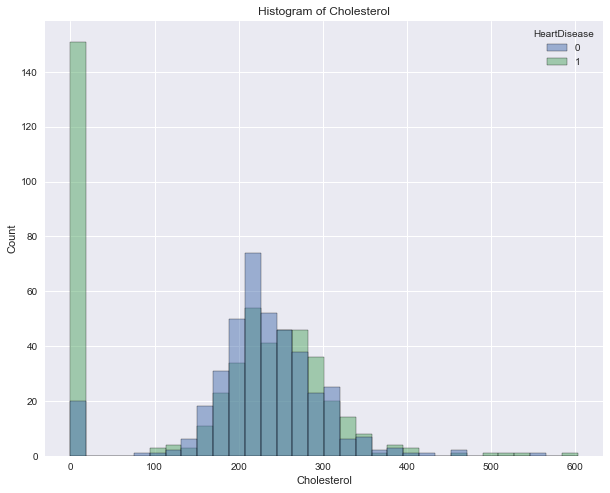

In [72]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease').set(title='Histogram of Cholesterol')

From the graph, there are 171 rows of cholesterols with zero values which is incorrect. Impute zero cholesterol with mean values.

In [73]:
df_no_heartdisease = df[df['HeartDisease'] == 0]
df_heartdisease = df[df['HeartDisease'] == 1]

In [74]:
positive_cholesterol_no_heartdisease = df_no_heartdisease[df_no_heartdisease['Cholesterol'] != 0]

In [75]:
mean_positive_cholesterol_no_heartdisease = positive_cholesterol_no_heartdisease['Cholesterol'].mean()

In [76]:
positive_cholesterol_heartdisease = df_heartdisease[df_heartdisease['Cholesterol'] != 0]

In [77]:
mean_positive_cholesterol_heartdisease = positive_cholesterol_heartdisease['Cholesterol'].mean()

In [78]:
zero_cholesterol_no_heartdisease_cond = (df['Cholesterol'] == 0) & (df['HeartDisease'] == 0)
zero_cholesterol_heartdisease_cond = (df['Cholesterol'] == 0) & (df['HeartDisease'] == 1)

In [79]:
df['Cholesterol'] = np.where(zero_cholesterol_no_heartdisease_cond, mean_positive_cholesterol_no_heartdisease, df['Cholesterol'])

In [80]:
df['Cholesterol'] = np.where(zero_cholesterol_heartdisease_cond, mean_positive_cholesterol_heartdisease, df['Cholesterol'])

## Resting ECG

In [81]:
ecg_dict = {'Normal':0, 'ST':1, 'LVH':2}
df['RestingECG_rank'] = df['RestingECG'].replace(ecg_dict)

## ExerciseAngina
Although regular exercise helps strengthen the heart and lowers the risk of cardiovascular problems long-term, strenuous exertion does increase the immediate risk of heart attack and sudden cardiac arrest.

In [82]:
exercise_dict = {'N':0, 'Y':1}
df['ExerciseAngina'] = df['ExerciseAngina'].replace(exercise_dict)

## Oldpeak
ST segment depression may be determined by measuring the vertical distance between the patient's trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it is more than 1 mm in V5-V6, or 1.5 mm in AVF or III.

[Text(0.5, 1.0, 'Histogram of Old Peak')]

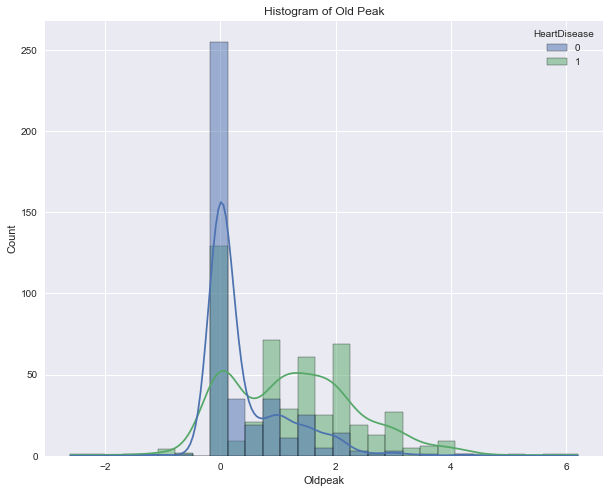

In [83]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', kde=True).set(title='Histogram of Old Peak')

Negative Oldpeak values should be changed to postive values.

In [84]:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = df['Oldpeak'] * -1

## ST Slope
Normal ST segment has a slight upward concavity. Flat, downsloping, or depressed ST segments may indicate coronary ischemia.

In [85]:
slope_dict = {'Up':0, 'Flat':1, 'Down':2}
df['ST_Slope_rank'] = df['ST_Slope'].replace(slope_dict)

# Correlation Plot

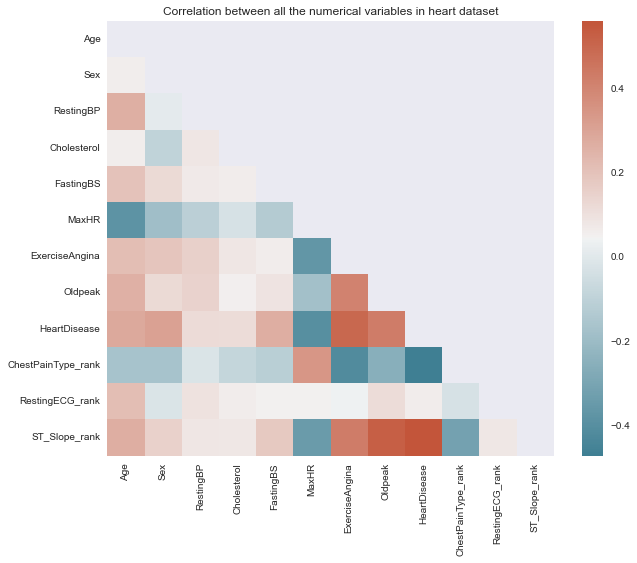

In [86]:
# Set up mask to be "True" in the upper triangle.
plt.figure(figsize=(10,8))
mask = np.zeros_like(df.corr().iloc[0:,0:])
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr().iloc[0:,0:], mask=mask,cmap=cmap).set(title="Correlation between all the numerical variables in heart dataset");

In [87]:
df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_rank,RestingECG_rank,ST_Slope_rank
Age,1.000000,0.055670,0.263084,0.057459,0.198170,-0.382280,0.216017,0.259482,0.282012,-0.165951,0.213349,0.268217
Sex,0.055670,1.000000,0.009427,-0.095530,0.120424,-0.189668,0.191226,0.121682,0.305118,-0.168437,-0.017930,0.150408
RestingBP,0.263084,0.009427,1.000000,0.080924,0.067823,-0.109693,0.153064,0.147278,0.117990,-0.020644,0.094520,0.082155
Cholesterol,0.057459,-0.095530,0.080924,1.000000,0.060380,-0.029197,0.083032,0.055344,0.114495,-0.083382,0.059588,0.078564
FastingBS,0.198170,0.120424,0.067823,0.060380,1.000000,-0.131067,0.059988,0.088961,0.267994,-0.116564,0.050280,0.176196
MaxHR,-0.382280,-0.189668,-0.109693,-0.029197,-0.131067,1.000000,-0.370023,-0.180418,-0.401410,0.343552,0.049165,-0.344047
ExerciseAngina,0.216017,0.191226,0.153064,0.083032,0.059988,-0.370023,1.000000,0.409574,0.495490,-0.416553,0.035470,0.429483
Oldpeak,0.259482,0.121682,0.147278,0.055344,0.088961,-0.180418,0.409574,1.000000,0.429377,-0.258445,0.115160,0.525738
HeartDisease,0.282012,0.305118,0.117990,0.114495,0.267994,-0.401410,0.495490,0.429377,1.000000,-0.471846,0.061791,0.558541
ChestPainType_rank,-0.165951,-0.168437,-0.020644,-0.083382,-0.116564,0.343552,-0.416553,-0.258445,-0.471846,1.000000,-0.031173,-0.317730


Our label will be the column 'HeartDisease', so we will look at the correlation of  the other features against it.
- Strong positive correlation with ST_Slope_rank (also ST_Slope), which proves that chance of a heart disease increases as the slop transforms from upsloping to downsloping.
- Strong positive correlation with ExerciseAngina indicates that exercising may potentially lead to heart disease.
- Strong positive correlation with Oldpeak means that chances of suffering from heart disease increase as the values increase.
- Positive correlation with Sex. Males tend to suffer from heart disease.
- Positive correlation with Age. As people get older, chances of a heart disease increase.
- Postive correlation with FastingBS. High blood glucose can damage blood vessels and nerves which can lead to heart disease. 
- Positive correlation with RestingBP. The higher the blood pressure, the harder the heart works to pump blood which can strain the heart and increase risk of heart attack.
- Positive correlation with Cholesterol. High cholesterol can raise the risk of developing a heart disease as it can build up and clog the blood vessels.
- Strong negative correlation with ChestPainType_rank (also ChestPainType) shows that heart disease usually occurs without chest pain.
- Strong negative correlation with MaxHR.

# EDA

## Age

Aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease. 

[Text(0.5, 1.0, 'Histogram of Age')]

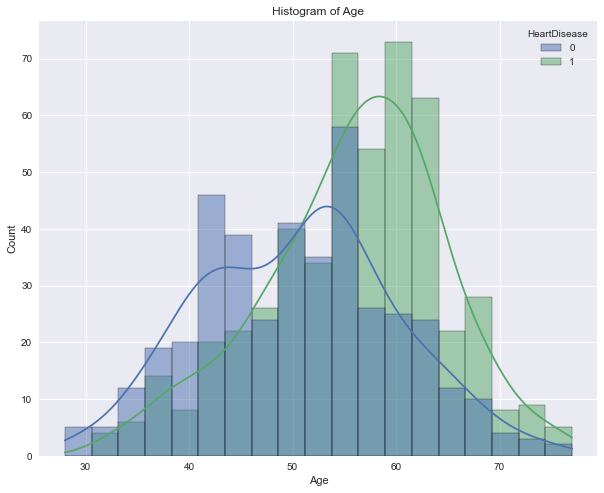

In [88]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True).set(title='Histogram of Age')

From the graph, older adults (ages > 54) are more likely to suffer from cardiovascular diease compared to younger ones.

# Sex

In [89]:
sex_dict = {0:'F', 1:'M'}
df['Sex'] = df['Sex'].replace(sex_dict)

In [90]:
df_no_heartdisease = df[df['HeartDisease'] == 0]
df_heartdisease = df[df['HeartDisease'] == 1]

In [91]:
df_no_heartdisease_m = df_no_heartdisease[df_no_heartdisease['Sex'] == 'M']

In [92]:
df_no_heartdisease_f = df_no_heartdisease[df_no_heartdisease['Sex'] == 'F']

In [93]:
df_heartdisease_m = df_heartdisease[df_heartdisease['Sex'] == 'M']

In [94]:
df_heartdisease_f = df_heartdisease[df_heartdisease['Sex'] == 'F']

In [95]:
total_m = len(df_no_heartdisease_m) + len(df_heartdisease_m)
prop_no_heartdisease_m = len(df_no_heartdisease_m) / total_m
prop_heartdisease_m = 1 - prop_no_heartdisease_m

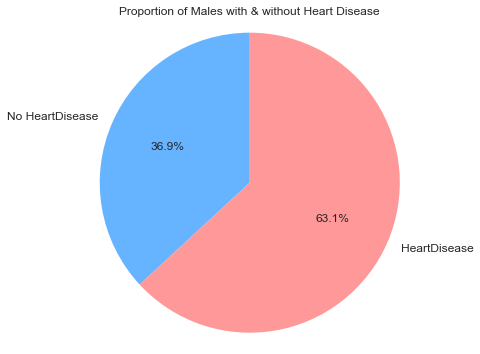

In [96]:
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie([prop_no_heartdisease_m, prop_heartdisease_m], labels=['No HeartDisease', 'HeartDisease'], autopct='%1.1f%%',
        colors = ['#66b3ff','#ff9999'], startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Males with & without Heart Disease')
plt.show()

In [97]:
total_f = len(df_no_heartdisease_f) + len(df_heartdisease_f)
prop_no_heartdisease_f = len(df_no_heartdisease_f) / total_f
prop_heartdisease_f = 1 - prop_no_heartdisease_f

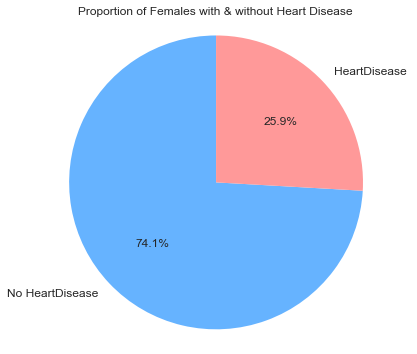

In [98]:
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie([prop_no_heartdisease_f, prop_heartdisease_f], labels=['No HeartDisease', 'HeartDisease'], autopct='%1.1f%%',
        colors = ['#66b3ff','#ff9999'], startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Females with & without Heart Disease')
plt.show()

## Chest Pain Type

[Text(0.5, 1.0, 'Countplot of Chest Pain Type')]

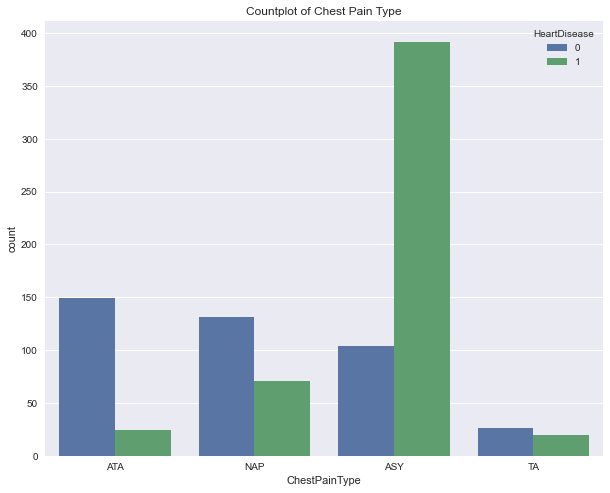

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease').set(title='Countplot of Chest Pain Type')

## Resting BP

[Text(0.5, 1.0, 'Histogram of Resting BP')]

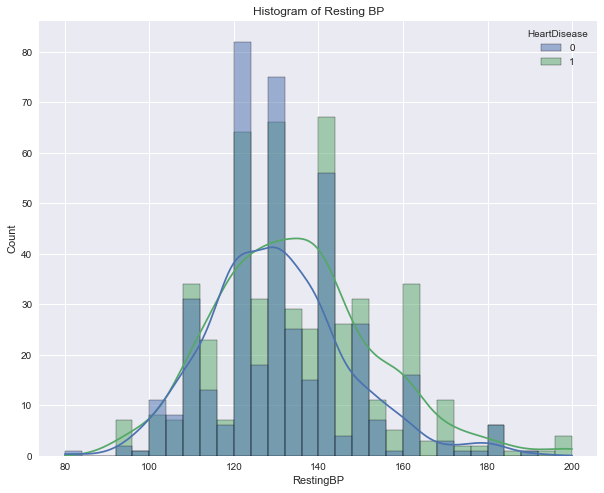

In [100]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='RestingBP', hue='HeartDisease', kde=True).set(title='Histogram of Resting BP')

From the graph, those with higher blood pressure are slightly more likely to suffer from heart disease.

## Cholesterol

[Text(0.5, 1.0, 'Histogram of Cholesterol')]

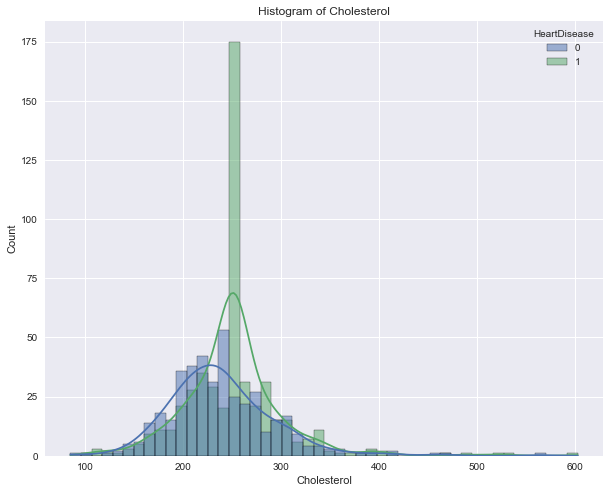

In [101]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True).set(title='Histogram of Cholesterol')

From the graph, those with higher cholesterol are likely to suffer from heart disease.

## Fasting Blood Sugar

[Text(0.5, 1.0, 'Countplot of Fasting Blood Sugar')]

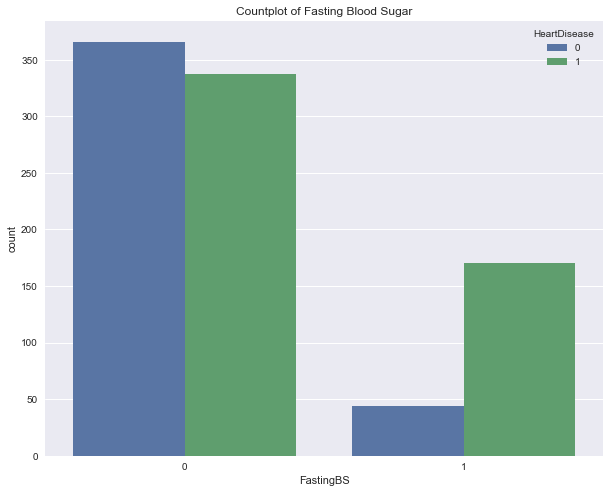

In [102]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease').set(title='Countplot of Fasting Blood Sugar')

From the graph, bigger proportion of those with FastingBS=1 (fasting blood sugar > 120mg/dl) has higher chance of suffering from heart disease.

## Resting ECG

[Text(0.5, 1.0, 'Countplot of Resting ECG')]

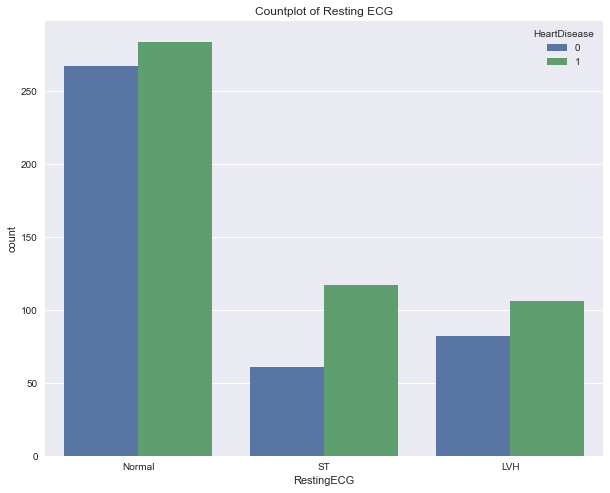

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='RestingECG', hue='HeartDisease').set(title='Countplot of Resting ECG')

From the graph, bigger proportion of those with ST resting ECG has higher chance of suffering from heart disease, followed by LVH then Normal resting ECG.

## Max HR

[Text(0.5, 1.0, 'Histogram of MaxHR')]

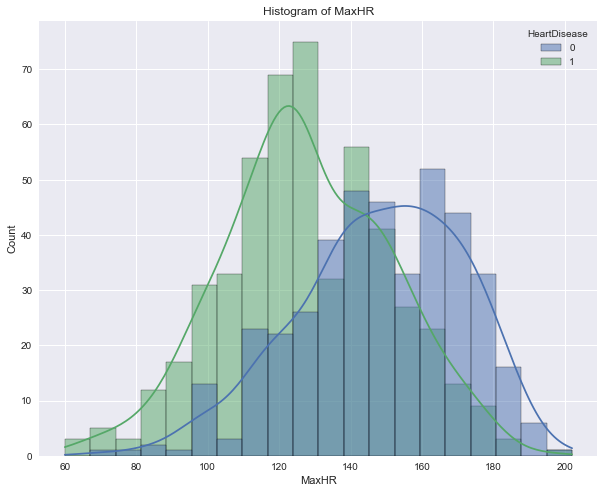

In [104]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='MaxHR', hue='HeartDisease', kde=True).set(title='Histogram of MaxHR')

From the graph, those with heart disease have lower Max Heart Rate compared to those without.

## ExerciseAngina

In [105]:
exercise_dict = {0:'N', 1:'Y'}
df['ExerciseAngina'] = df['ExerciseAngina'].replace(exercise_dict)

[Text(0.5, 1.0, 'Countplot of ExerciseAgina')]

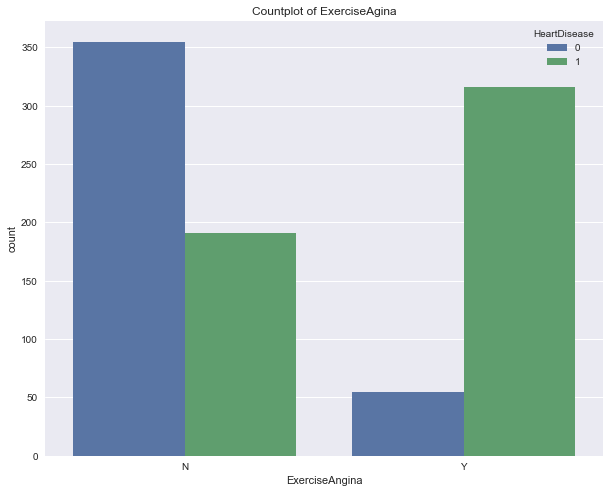

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease').set(title='Countplot of ExerciseAgina')

From the graph, those who exercise have a higher chance of suffering from a heart disease.

## Oldpeak

[Text(0.5, 1.0, 'Histogram of Old Peak')]

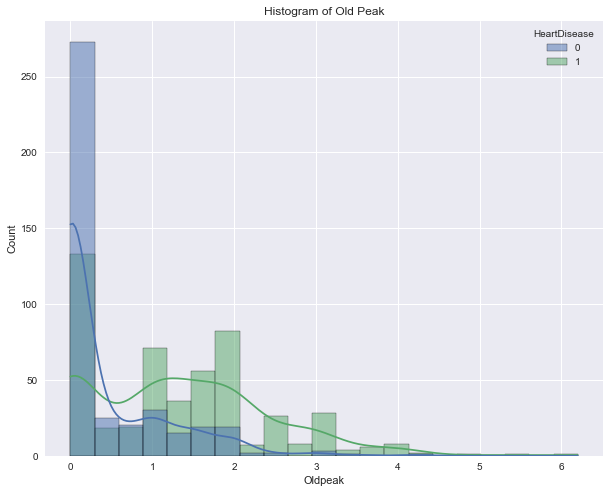

In [107]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', kde=True).set(title='Histogram of Old Peak')

From the graph, those showing higher Oldpeak values are more likely to suffer from heart disease.

## ST_Slope 

[Text(0.5, 1.0, 'Countplot of ST Slope')]

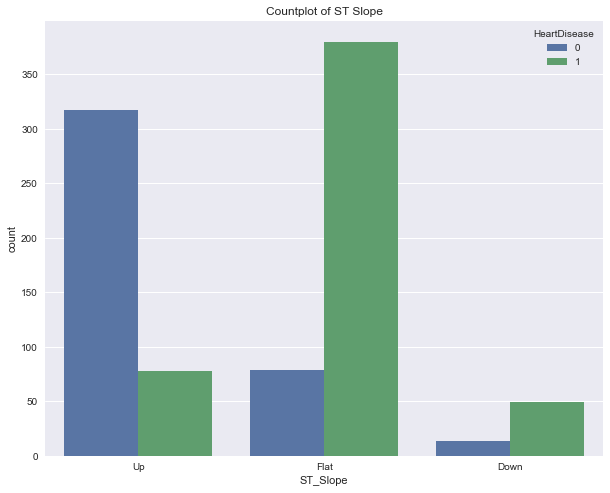

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease').set(title='Countplot of ST Slope')

From the graph, bigger proportion of those with flat ST slop has higher chance of suffering from heart disease, followed by downsloping then upsloping.

# Conclusion

From this EDA, 'ST_Slope', 'Oldpeak', 'ExerciseAngina', 'ChestPainType' and 'MaxHR' greatly affects the chance of developing a heart disease.

Positive correlations are seen in 'Sex', 'Age', 'FastingBS', 'RestingBP', 'Cholesterol'.

Categorial feature 'RestingECG' has little correlation with 'HeartDisease'. Although on the graph, those with ST type 'RestingECG' has higher chance of developing a heart disease.